#Miembros del grupo:
- Natalia Maury Castañeda (u201816996)
- Carlos Iparraguirre (u201810601)
- Joaquín Galván (u20181a010)

#Librerías

In [ ]:
#Instalar OrTools
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Librerías
import pandas as pd #DataFrame
import numpy as np
import random 
from random import randint
from shapely.geometry import Polygon, LineString, Point
from ortools.sat.python import cp_model #Modelo
from random import randint #Random
import matplotlib.pyplot as plt #Visualizaciones
from itertools import cycle #Visualizaciones
import geopandas as gpd
from itertools import cycle

#Datos

##Información General sobre los Datos:

**Datos a encontrar:**
- Obtener datos de geolocalización real de al menos 30 centros de vacunación
- Obtener/Generar los datos de geolocalización de al menos 10 000 personas en 5 distritos

**Link Datos:**
- Excel con Datos de los CV: https://docs.google.com/spreadsheets/d/19lirOgkcPSptq-yFP-oHlq1UciccC2XjcRzW6-Msny8/edit?usp=sharing 

##Código

In [ ]:
#Datos
Info_CV = pd.read_csv('Datos.csv')

In [ ]:
Info_CV.head(30)

,ID,Distrito,Nombre CV,Latitud,Longitud,Capacidad
0,1,Surco,Jockey Plaza,-12.086063,-76.979793,NaN
1,2,San Borja,Polideportivo de San Borja,-12.108041,-77.007119,NaN
2,3,Lurín,Polideportivo Ichiro Arakaki,-12.271518,-76.870840,NaN
3,4,Jesus María,Campo de Marte,-12.068153,-77.041364,NaN
4,5,San Juan de Lurigancho,IPD Bayovar,-11.956250,-76.988323,NaN
5,6,San Juan de Lurigancho,Parque Zonal Huiracocha,-12.009224,-77.001276,NaN
6,7,Ventanilla,Piscina Municipal de Mi Perú,-11.853935,-77.122501,NaN
7,8,Ventanilla,Plaza Cívica de Ventanilla,-11.877424,-77.127389,NaN
8,9,Ventanilla,Plaza Cívica de Pachacútec,-11.831946,-77.153578,NaN
9,10,Ventanilla,Capitán de Corbeta Manuel Clavero Muga,-11.888044,-77.128292,NaN


In [ ]:
#Tamaños variables
n_V = 30 #Cantidad de centros de vacunación
n_P = 1000 #Cantidad de pacientes  ##1000 ES SOLO DE PRUEBA
n_Ci = [50 for _ in range(n_V)] #Capacidad de cada centro de vacunación (valor estático por ahora)
n_vac = [randint(0,1) for _ in range(n_P)]

In [ ]:
print(len(n_vac))

1000


In [ ]:
CapacidadTotal = sum(n_Ci)
print("Capacidad total de todos los centros de vacunación: ", CapacidadTotal)

Capacidad total de todos los centros de vacunación:  1500


###Localización

In [ ]:
Localizacion_CV = Info_CV.iloc[:,3:-1].values
print("Localización de los centros de vacunación en todos los distritos: ")
#print(Localizacion_CV)

Localización de los centros de vacunación en todos los distritos: 


In [ ]:
Localizacion_CV[0][1]

-76.97979332

In [ ]:

print(max(Localizacion_CV[:,0]))
print(min(Localizacion_CV[:,0]))

print(max(Localizacion_CV[:,1]))
print(min(Localizacion_CV[:,1]))

-11.83194618
-12.271518
-76.82633239
-77.15357768


#### Límites del mapa escogido.
Para delimitar el mapa que usaremos primero fijamos los extremos de en los centros de vacunación más alejados, después agrandamos el mapa de manera arbitraria. En este espacio es donde podrán aparecer los pacientes al azar que generemos.

Como resultado obtenemos lo siguiente:


*   Latitud máxima:  -11.8109
*   Latitud mínimia: -12.3205
*   Longitud máxima: -76.7725
*   Longitud mínima: -77.1941



In [ ]:
lat_max = -11.8109
lat_min = -12.3205
lon_max = -76.7725
lon_min = -77.1941

limits = ((lon_min,lon_max,lat_min,lat_max))


In [ ]:
print(limits)

(-77.1941, -76.7725, -12.3205, -11.8109)


#### Localización pacientes


Generamos la ubicación de los pacientes en base a los extremos de la ciudad. Después, verificamos si los datos se encuentran dentro del mapa.

In [ ]:
lima_info = "peru_departamental_simple.geojson"

In [ ]:
region_geojson = gpd.read_file(lima_info) #importante parte
region_geojson.head(15)

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."
5,CAJAMARCA,127,06,3304465.549,"POLYGON ((-79.32259 -7.02568, -79.29663 -6.999..."
6,CALLAO,6,07,14140.954,"POLYGON ((-77.18710 -11.82836, -77.12605 -11.8..."
7,CUSCO,108,08,7207614.240,"POLYGON ((-72.47177 -14.66140, -72.46170 -14.6..."
8,HUANCAVELICA,94,09,2206503.876,"POLYGON ((-75.05905 -14.12962, -75.10884 -14.0..."
9,HUANUCO,76,10,3720052.603,"POLYGON ((-77.31749 -8.53015, -77.26408 -8.467..."


In [ ]:
lima = region_geojson[region_geojson.NOMBDEP=='LIMA']
callao = region_geojson[region_geojson.NOMBDEP=='CALLAO']

In [ ]:
n = 0
x = []
y = []
temp = []
puntos = []

while(n != n_P):
    j = []
    k = []
    j.append(random.uniform(lon_min,lon_max))
    k.append(random.uniform(lat_min,lat_max))
    temp = gpd.GeoSeries(gpd.points_from_xy(j,k))
    if temp.within(lima.unary_union).all() or temp.within(callao.unary_union).all(): 
      # print("entro el ", n+1)
      x.append(j)
      y.append(k)
      n+=1
print(len(x),len(y))

loc_p = [ [x[i][0],y[i][0]] for i in range(n)]
puntos = gpd.GeoSeries(gpd.points_from_xy(x,y))
# puntos = puntos[puntos.within(lima.unary_union)]

1000 1000


In [ ]:
print(len(loc_p))

1000


In [ ]:
print(len(puntos))
print(n_P)

1000
1000


In [ ]:
#Severidad/Urgencia de vacunación (Edad de los pacientes)>
Edad_Pacientes = [randint(10,80) for _ in range(n_P)]
print("Edades de los pacientes (Mayor edad = Mayor urgencia/Prioridad de vacunación): ")
print(Edad_Pacientes)

Edades de los pacientes (Mayor edad = Mayor urgencia/Prioridad de vacunación): 
[23, 18, 73, 44, 37, 20, 75, 39, 49, 50, 77, 34, 42, 47, 38, 23, 24, 13, 40, 52, 37, 11, 37, 65, 78, 67, 53, 35, 14, 77, 41, 78, 59, 69, 53, 72, 61, 74, 41, 39, 71, 74, 21, 20, 68, 63, 71, 22, 62, 14, 23, 38, 14, 42, 30, 64, 53, 37, 32, 13, 32, 30, 54, 67, 80, 56, 63, 54, 20, 47, 31, 62, 62, 55, 17, 39, 39, 40, 73, 54, 49, 53, 18, 11, 65, 73, 79, 52, 58, 20, 30, 49, 35, 64, 15, 12, 60, 30, 27, 69, 19, 76, 76, 21, 55, 30, 59, 28, 43, 51, 43, 38, 20, 50, 53, 38, 28, 39, 15, 74, 37, 18, 26, 13, 31, 41, 31, 27, 27, 32, 75, 53, 34, 77, 20, 36, 25, 22, 29, 22, 21, 14, 60, 50, 32, 24, 61, 51, 48, 55, 25, 61, 63, 41, 45, 77, 44, 60, 41, 20, 58, 21, 70, 64, 54, 12, 42, 64, 66, 60, 22, 13, 22, 24, 56, 64, 62, 72, 74, 72, 28, 51, 72, 61, 40, 65, 39, 67, 42, 21, 58, 17, 62, 37, 80, 21, 32, 41, 72, 56, 62, 37, 78, 11, 54, 34, 15, 32, 18, 68, 77, 50, 48, 54, 32, 23, 28, 16, 36, 63, 15, 27, 60, 76, 67, 59, 16, 52, 32, 32,

### Visualización Pacientes y centros de vacunación

In [ ]:
#cargamos la imagen del mapa 
mapa = plt.imread("map.png")

In [ ]:
#definimos los puntos más aljados de los centrso de vacunación.
BBox = ((Info_CV.Longitud.min(),   Info_CV.Longitud.max(),      
         Info_CV.Latitud.min(), Info_CV.Latitud.max()))
print(BBox)

(-77.15357768, -76.82633239, -12.271518, -11.83194618)


In [ ]:
Tamaño = [prioridad/10 for prioridad in Edad_Pacientes] #Tamaño = edad de los pacientes (Grado de urgencia según tamaño)
print(len(Tamaño))

1000


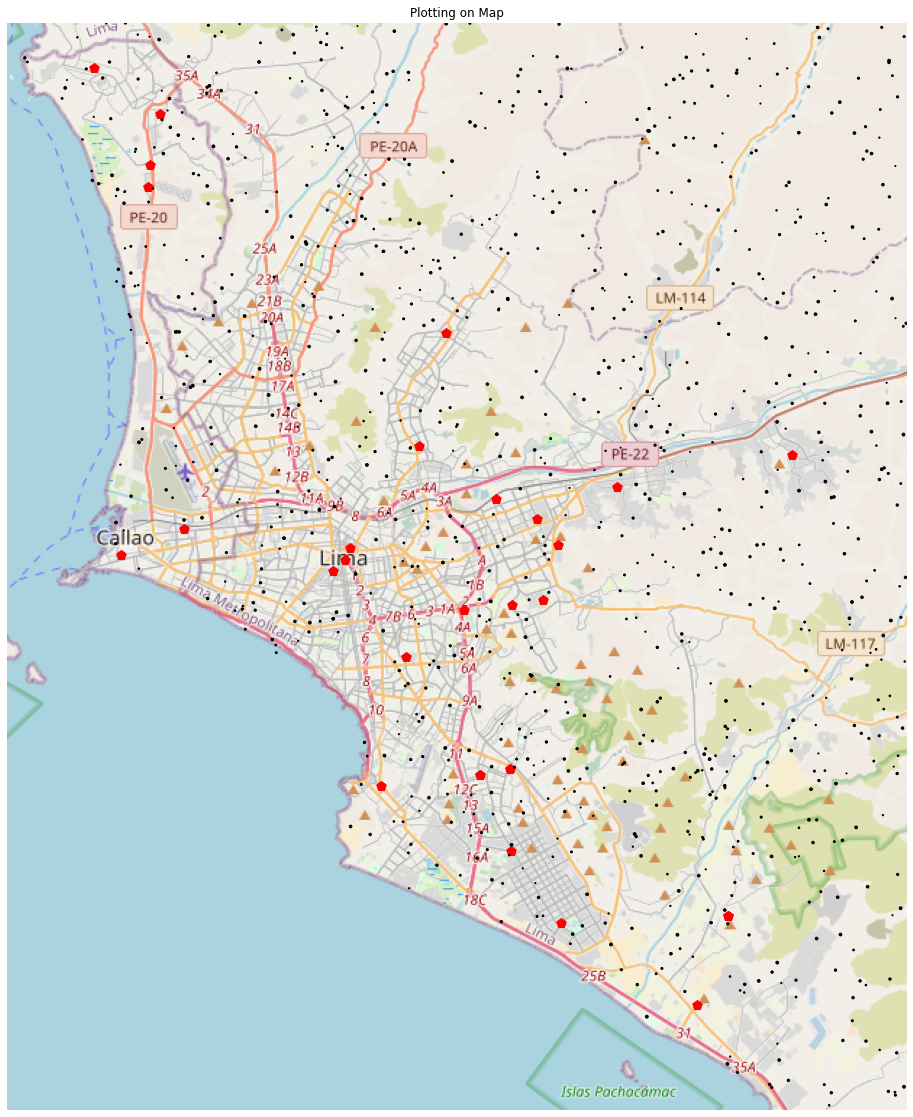

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))

#puntos Centros de vacunacion
ax.scatter(Info_CV.Longitud, Info_CV.Latitud, zorder=1, alpha= 1, c='r',marker='p', s=100)
# ax.scatter(Info_CV.Longitud, Info_CV.Latitud, zorder=1, alpha= 1, c='r', s=100)

#puntos pacientes
ax.scatter(puntos.x,puntos.y, s=Tamaño, c='black', label='pacientes')


ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
ax.set_title('Plotting on Map')
plt.axis('off')


# ax.set_xlim(BBox[0],BBox[1])
# ax.set_ylim(BBox[2],BBox[3])

# ax.imshow(map,zorder=0,extent = limits, aspect='equal')
ax.imshow(mapa, zorder=0, extent = limits, aspect= 'equal')

#Modelo

**Objetivo del modelo:** Encontrar un set de variables que satisfaga todos los constraints/restricciones para asociar cada vacuna de un centro de vacunación a una persona

**Parámetros a considerar:**
  - Edad de las personas
  - Localización de las personas
  - Número de dosis
  - Capacidad de los centros de vacunación
  - Localización de los centros de vacunación


**Variables:**
- V = centros de vacunación
- Ci = Capacidad del centro de vacunación
- P = Número/Set de pacientes
- Vac = Paciente vacunado

**Set de variables definido:** xijk ∈ {0, 1} donde (i, j, k) ∈ V × Ci × P
- Si en el centro i, la vacuna j es tomada por la persona k, entonces xijk = 1.
- Si en el centro i, la vacuna j no es tomada por la persona k, entonces xijk = 0.
- Es una variable booleana

In [ ]:
#Crear modelo
model = cp_model.CpModel()

In [ ]:
#Variables y dominios
x = {} #Set de variables definido

for i in range(n_V):
  for j in range(n_Ci[i]):
    for k in range(n_P):
      x[(i,j,k)] = model.NewBoolVar('x_'+str(i)+'_'+str(j)+'_'+str(k)+'_'+str(k))

##Hard Constraints (Restricciones)**
- Cada vacuna debe ser aplicada como máximo a una persona
- Debe haber como máximo un centro asignado a cada persona
- Las personas vacunadas no deben ser asignadas a ningun centro
- Las personas infectadas no deben ser vacunadas hasta 3 meses despues

In [ ]:
#Cada vacuna debe ser aplicada como máximo a una persona
for i in range(n_V): #Por cada centro
  for j in range(n_Ci[i]): #Vacunas disponibles
    model.Add(sum( [x[(i,j,k)] for k in range(n_P)]) <= 1) #Cada persona tiene aplicada max 1 vacuna

In [ ]:
#Debe haber como máximo un centro asignado a cada persona
for k in range(n_P):
  n_personas_CV = []
  for i in range(n_V):
    n_personas_CV.append( sum(x[(i,j,k)] for j in range(n_Ci[i])) ) #basicamente estas pasando por cada vacuna posible en el CV y sumas cuantas hay
  model.Add(sum(n_personas_CV) <= 1)


In [ ]:
#Las personas vacunadas no deben ser asignadas a ningun centro
for i in range(n_V):#por CV
  for j in range(n_Ci[i]): # por centro 
    for k in range(n_P): #por persona
      if n_vac[k]:
        model.Add(x[(i,j,k)] == False)

**Soft Constraints (Restricciones)**
- Cada persona sin vacunar debería ser asignada a una vacuna
- Cada persona debería ser asignada al centro más cercano
- Las personas mayores de edad deberían ser asignadas primero

In [ ]:
#Soft Constraints (Restricciones)

def dist(p1,p2):
  return float(((p1[0]-p2[1])**2+(p1[1]-p2[0])**2)**0.5)

max_dist = 0
for i in range(n_V):
  for k in range(n_P):
    if max_dist < dist(loc_p[k], Localizacion_CV[i]):
      max_dist = dist( loc_p[k], Localizacion_CV[i])


pref = []
for i in range(n_V):
  for j in range(n_Ci[i]):
    for k in range(n_P):
      # pref += [x[(i,j,k)]]
      # print(i,j,k)
      # print(loc_p[k],Localizacion_CV[i],Edad_Pacientes[k])
      
      pref += [x[(i,j,k)] * (100 - 100 * dist(loc_p[k], Localizacion_CV[i]) / max_dist + 100 * Edad_Pacientes[k] / 80)]



model.Maximize(sum(pref))

#Solver

In [ ]:
#Crear solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
#Visualización de la solución (Imprimir los datos)
if status == cp_model.OPTIMAL:
  print('Tiempo:',solver.WallTime())
  for cv in range(n_V):
    print("\n El centro de vacunación \"", cv+1, "\" tiene una capacidad de ",n_Ci[cv])
    for ci in range(n_Ci[cv]):
      for  p in range(n_P):
        # print(p+1)
        if solver.Value(x[(cv,ci,p)]):
          print("Paciente ", p+1, "tiene el turno:  ",ci+1)

Tiempo: 168.45034671500002

 El centro de vacunación " 1 " tiene una capacidad de  50
Paciente  790 tiene el turno:   4
Paciente  486 tiene el turno:   5
Paciente  669 tiene el turno:   7
Paciente  868 tiene el turno:   9
Paciente  209 tiene el turno:   15
Paciente  494 tiene el turno:   47

 El centro de vacunación " 2 " tiene una capacidad de  50
Paciente  514 tiene el turno:   2
Paciente  594 tiene el turno:   10
Paciente  189 tiene el turno:   13
Paciente  821 tiene el turno:   16
Paciente  586 tiene el turno:   25
Paciente  106 tiene el turno:   26
Paciente  304 tiene el turno:   28
Paciente  750 tiene el turno:   29
Paciente  276 tiene el turno:   47
Paciente  769 tiene el turno:   48
Paciente  214 tiene el turno:   49

 El centro de vacunación " 3 " tiene una capacidad de  50
Paciente  248 tiene el turno:   1
Paciente  525 tiene el turno:   2
Paciente  111 tiene el turno:   3
Paciente  953 tiene el turno:   4
Paciente  925 tiene el turno:   9
Paciente  561 tiene el turno:   12
P

# Gráfico

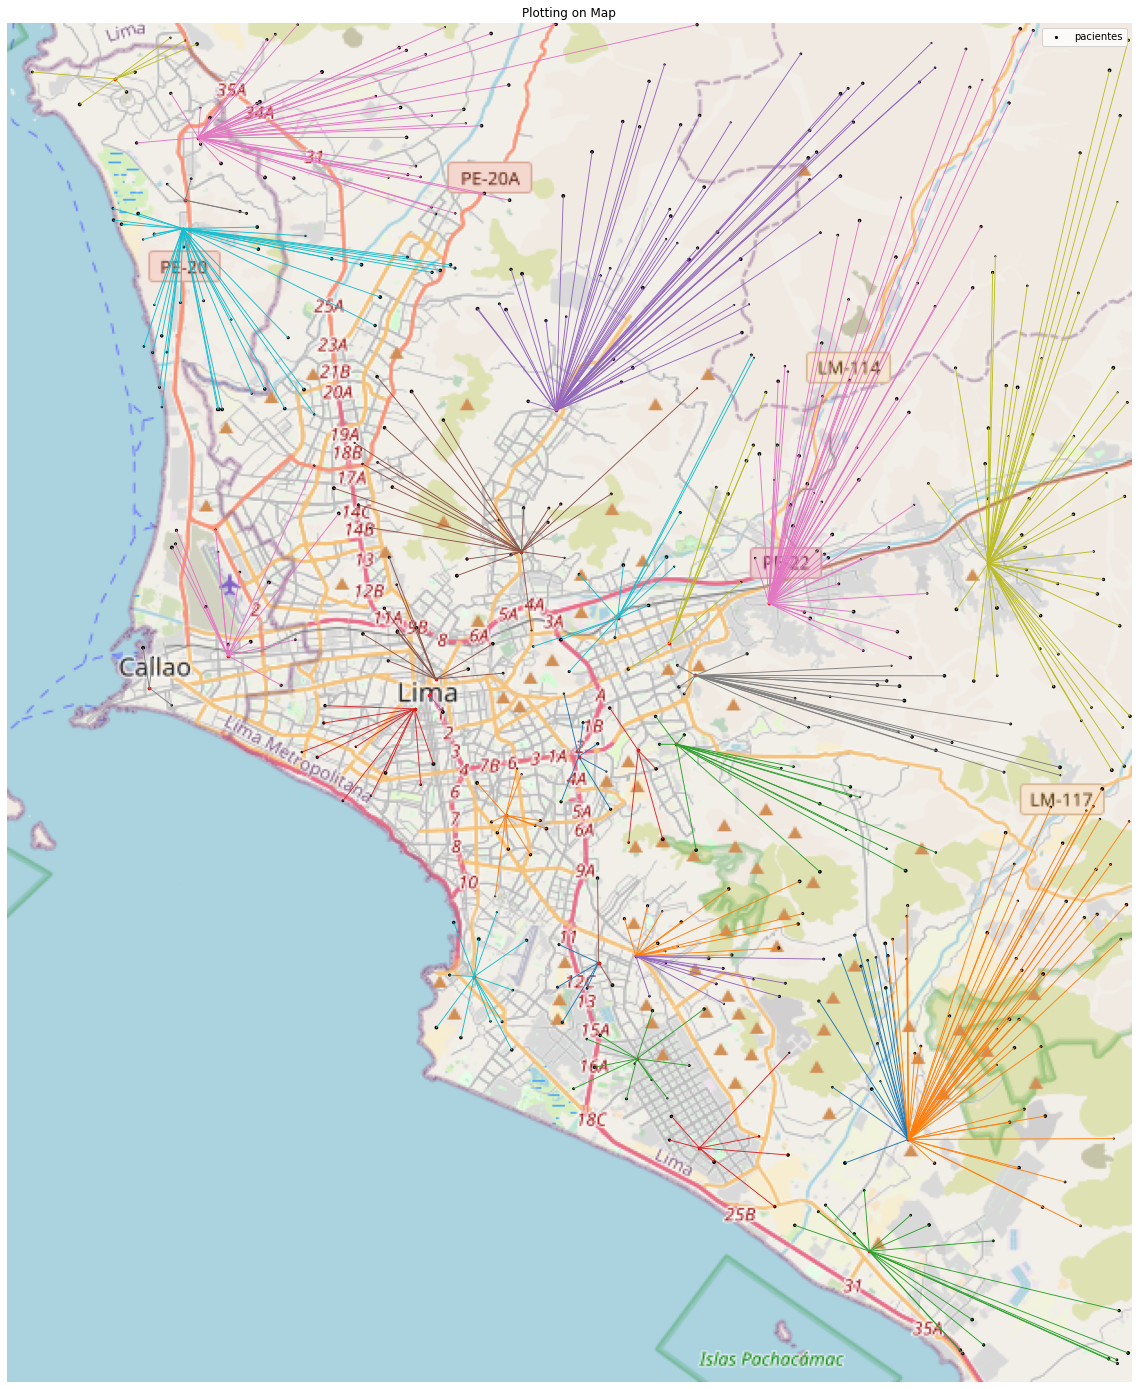

In [ ]:
fig, ax = plt.subplots(figsize = (25,25))
x2 = []
y2 = []
t2 = []

#puntos Centros de vacunacion
ax.scatter(Info_CV.Longitud, Info_CV.Latitud, zorder=1, alpha= 1, c='r',marker='p', s=10)
# ax.scatter(Info_CV.Longitud, Info_CV.Latitud, zorder=1, alpha= 1, c='r', s=100)

#puntos pacientes
# ax.scatter(puntos.x,puntos.y, s=Tamaño, c='black', label='pacientes')

#dibujar lineas
# colores = cycle('bgrcmk')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])

plot_lineas = [[] for _ in range(n_V)]
for i in range(n_V):
  for j in range(n_Ci[i]):
    for k in range(n_P):
      if solver.Value(x[(i,j,k)]):
        linea_abcisa = [Localizacion_CV[i][1], loc_p[k][0]]  #locacion_CV esta como  y,x 
        linea_ordenada = [Localizacion_CV[i][0], loc_p[k][1]]
        plot_lineas[i].append([linea_abcisa,linea_ordenada])
        x2.append(loc_p[k][0])
        y2.append(loc_p[k][1])
        t2.append(Tamaño[k])
for i in range(n_V):
  c = next(colors)
  for (x_,y_) in plot_lineas[i]:
    plt.plot(x_, y_, c=c, linewidth=.9)


#solo los puntos que no estan vacunados
ax.scatter(x2,y2, s=t2, c='black', label='pacientes')



ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
ax.set_title('Plotting on Map')
plt.axis('off')
plt.legend()

# ax.set_xlim(BBox[0],BBox[1])
# ax.set_ylim(BBox[2],BBox[3])

# ax.imshow(map,zorder=0,extent = limits, aspect='equal')
ax.imshow(mapa, zorder=0, extent = limits, aspect= 'equal')

#Conclusiones

El modelo mostró ser efectivo para resolver el problema planteado. Si bien este problema también podría haber sido resuelto con un modelo de data mining o machine learning, constraint programming era más efectivo y la mejor solución para ello. Los modelos de machine learning o data mining necesitan datos de entrenamiento para poder funcionar y tener la mejor eficacia, mientras que constraint programming no necesita ningún tipo de entrenamiento. Por ende, el problema tendría la mejor solución aplicando constraint programming ya que puede soportar múltiples parámetros, no requiere entrenamiento de datos y es bastante rápido. 